In [3]:
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.nanoevents.methods import vector
import awkward as ak
import matplotlib.pyplot as plt

ImportError: Numba requires at least version 0.38.0 of llvmlite.
Installed version is 0.36.0.
Please update llvmlite.

In [2]:
fname = "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/ZToMuMu_M-120To200_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/260000/C8C3CB64-20D4-F943-BAC9-73EDE6F16331.root"
events = NanoEventsFactory.from_root(fname,schemaclass=NanoAODSchema).events()

/afs/cern.ch/user/s/sduqueme/.conda/envs/coffea/lib/python3.7/site-packages/uproot/reading.py:177: FutureWarning: XRootD 5.1.1 is not fully supported; either upgrade to 5.2.0+ or set

    open.defaults["xrootd_handler"] = uproot.MultithreadedXRootDSource

  warnings.warn(message, FutureWarning)


In [3]:
muon = ak.pad_none(events.Muon,target = 2)
leading_muons_mass = (muon[:,0] + muon[:,1]).mass

mask = (
    (np.sum(muon.pt > 0,axis=1) == 2)
    & (ak.prod(muon.charge, axis=1) == -1)
    & (muon.pt[:,0] > 30)
    & (muon.pt[:,1] > 30)
    & (abs(muon.eta)[:,0] < 2.1)
    & (abs(muon.eta)[:,0] < 2.1)
    & ((60 < leading_muons_mass) & (leading_muons_mass < 120))
)

print(f"Number of events before the cuts: {len(events)}")
print(f"Number of events after the cuts: {ak.sum(mask)}")

Number of events before the cuts: 100000
Number of events after the cuts: 2566


/afs/cern.ch/user/s/sduqueme/.conda/envs/coffea/lib/python3.7/site-packages/awkward/_connect/_numpy.py:196: RuntimeWarning: invalid value encountered in sqrt
  *[nplike.asarray(x) for x in inputs], **kwargs


In [4]:
def get_pt_x(obj:ak.Array):
    return ak.sum(obj.pt * np.cos(obj.phi), axis=1)

def get_pt_y(obj:ak.Array):
    return ak.sum(obj.pt * np.sin(obj.phi), axis=1)

def get_met(objs: list):
    """return a PolarTwoVector for MET"""
    pt_x = ak.sum([get_pt_x(obj) for obj in objs], axis=0,mask_identity=True)
    pt_y = ak.sum([get_pt_y(obj) for obj in objs], axis=0,mask_identity=True)
    return ak.zip(
        {
            "pt":np.sqrt(pt_x **2 + pt_y **2),
            "phi": np.arctan(pt_y / pt_x) + np.pi
        },
        with_name = "PolarTwoVector",
        behavior = vector.behavior
    )

In [5]:
Objects = {
    "jet": events[mask].Jet,
    "electron": events[mask].Electron,
    "tau": events[mask].Tau
}
met = get_met(Objects.values())

In [12]:
met

<PolarTwoVectorArray [{pt: 5.55, phi: 1.84, ... phi: None}] type='45244 * PolarT...'>

In [11]:
events.MET[mask].pt

<Array [22.5, None, None, ... None, None, None] type='45244 * ?float32[parameter...'>

In [8]:
met

<PolarTwoVectorArray [{pt: 5.55, phi: 1.84, ... phi: None}] type='45244 * PolarT...'>

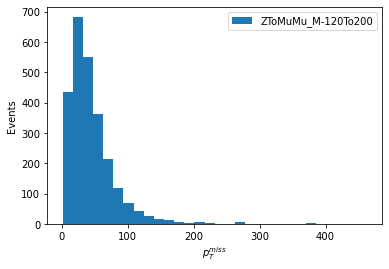

In [6]:
plt.hist(met["pt"],bins=30)
plt.xlabel("$p_T^{miss}$")
plt.ylabel("Events")
plt.legend(["ZToMuMu_M-120To200"]);

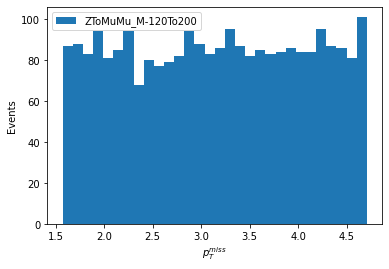

In [7]:
plt.hist(met["phi"],bins=30)
plt.xlabel("$p_T^{miss}$")
plt.ylabel("Events")
plt.legend(["ZToMuMu_M-120To200"]);